In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_programmatic = pd.read_csv('data/programmatic_publisher.csv')

In [5]:
df_programmatic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17493428 entries, 0 to 17493427
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   dsp_id           object 
 1   timestamp_utc    object 
 2   campaign_name    object 
 3   device_type      object 
 4   cost_milli_cent  float64
dtypes: float64(1), object(4)
memory usage: 667.3+ MB


In [6]:
df_programmatic.head(10)

,dsp_id,timestamp_utc,campaign_name,device_type,cost_milli_cent
0,dsp9tnGII5BeXbn6LUSFZPcKGCyI0F,2024-02-06 04:10:41,Contextual,Phone,283.496
1,dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ,2024-02-26 23:49:23,Retargeting,PC,1884.537
2,dspcd3UcXUcUk0PEo2hb8CEH3WVlFE,2024-06-16 20:55:27,Contextual,TV,601.930
3,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-06-26 19:15:54,Contextual,TV,1191.750
4,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-05-31 18:38:54,Retargeting,TV,739.262
5,dspSnORtuQRLSkZKp9nbSIpbJBQLP1,2024-06-05 22:50:03,Retargeting,PC,153.500
6,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-09 21:06:22,Contextual,TV,5878.010
7,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-15 21:41:44,Contextual,TV,3073.631
8,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-16 20:47:06,Contextual,TV,3161.905
9,dspfp8NFN8MfPTM5zvmeSJYqX9NzSW,2024-05-16 21:56:50,Contextual,TV,2582.035


In [7]:
for col in df_programmatic.columns:
    print(f"\n📌 Unique values in '{col}':")
    print(df_programmatic[col].unique())



📌 Unique values in 'dsp_id':
['dsp9tnGII5BeXbn6LUSFZPcKGCyI0F' 'dsp1hXcI9Q6TZYzLEmeTkxzhjqD6HJ'
 'dspcd3UcXUcUk0PEo2hb8CEH3WVlFE' ... 'dspbV1X6ia7x8IMxQQgHqasXsZvSev'
 'dsp4PJIYh8QWwR5FCxYcxPJzUOCuQo' 'dspeuhlwK7LBRgCX3sMsSMFIxLHkeD']

📌 Unique values in 'timestamp_utc':
['2024-02-06 04:10:41' '2024-02-26 23:49:23' '2024-06-16 20:55:27' ...
 '2024-04-21 10:54:56' '2024-03-07 21:07:25' '2024-06-19 00:04:31']

📌 Unique values in 'campaign_name':
['Contextual' 'Retargeting']

📌 Unique values in 'device_type':
['Phone' 'PC' 'TV' 'Unknown' 'Robot']

📌 Unique values in 'cost_milli_cent':
[ 283.496 1884.537  601.93  ... 2362.996 1902.544 1589.538]


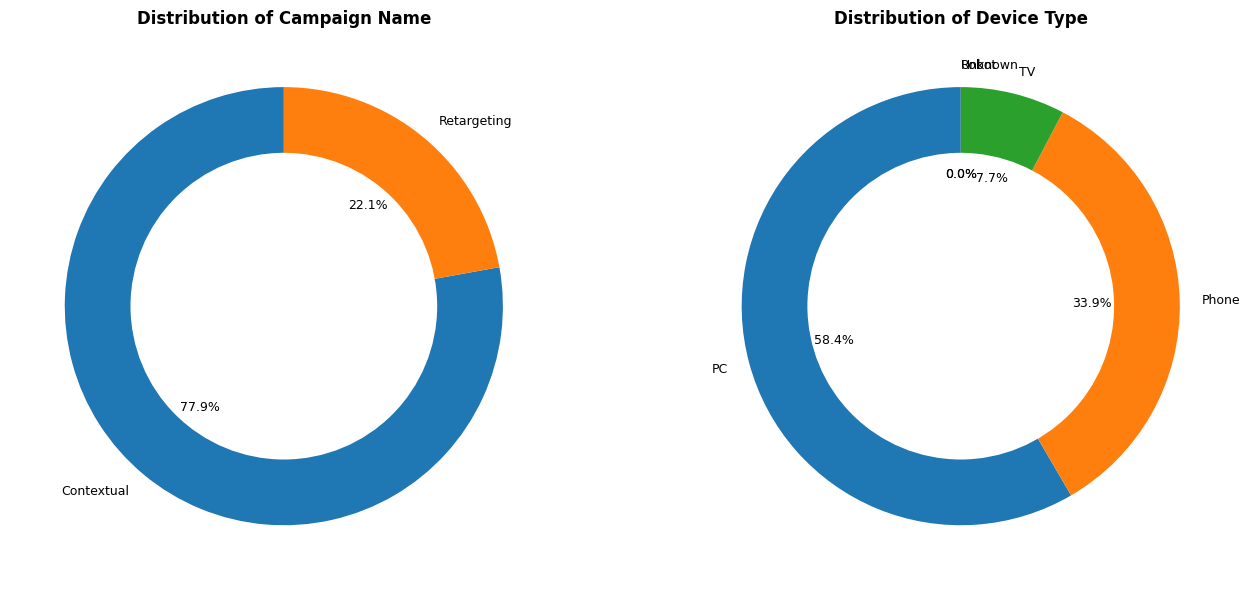

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Donut chart for campaign_name
campaign_counts = df_programmatic['campaign_name'].value_counts()
ax1.pie(campaign_counts, labels=campaign_counts.index, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 9})
ax1.set_title('Distribution of Campaign Name', fontsize=12, fontweight='bold')
circle = plt.Circle((0, 0), 0.70, fc='white')
ax1.add_artist(circle)

# Donut chart for device_type
device_counts = df_programmatic['device_type'].value_counts()
ax2.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 9})
ax2.set_title('Distribution of Device Type', fontsize=12, fontweight='bold')
circle = plt.Circle((0, 0), 0.70, fc='white')
ax2.add_artist(circle)

plt.tight_layout()
plt.show()

Unknow et Robot are rare in our Data base:

*** We can drop lines concerned

*** Or use it in the goal to catch some information about it

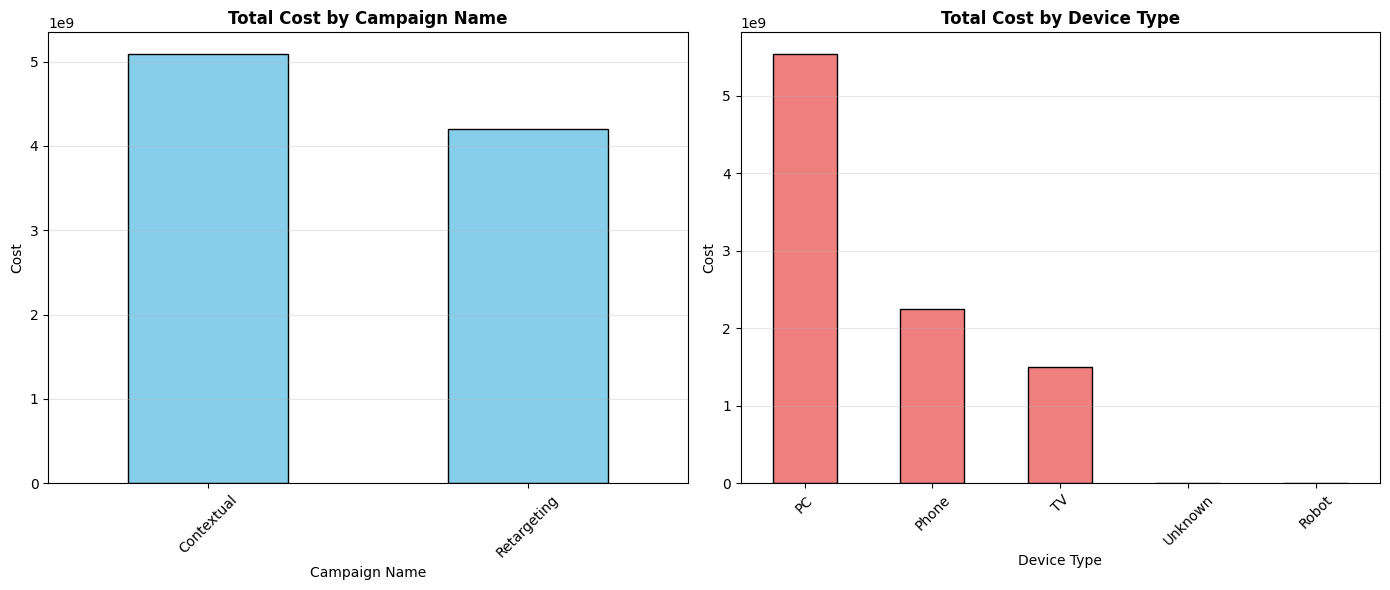

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Cost distribution by campaign_name
cost_by_campaign = df_programmatic.groupby('campaign_name')['cost_milli_cent'].sum().sort_values(ascending=False)
cost_by_campaign.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Total Cost by Campaign Name', fontsize=12, fontweight='bold')
ax1.set_xlabel('Campaign Name', fontsize=10)
ax1.set_ylabel('Cost', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Cost distribution by device_type
cost_by_device = df_programmatic.groupby('device_type')['cost_milli_cent'].sum().sort_values(ascending=False)
cost_by_device.plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Total Cost by Device Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Device Type', fontsize=10)
ax2.set_ylabel('Cost', fontsize=10)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Contextual compaign had cost more than retargetting compaign
For device, PC cost the most following by Phone and TV

AVERAGE COST BY CAMPAIGN NAME
campaign_name
Retargeting    1085.273460
Contextual      373.907072
Name: cost_milli_cent, dtype: float64

AVERAGE COST BY DEVICE TYPE
device_type
TV         1112.711187
Unknown     607.902041
PC          542.750228
Phone       379.904634
Robot       337.268667
Name: cost_milli_cent, dtype: float64


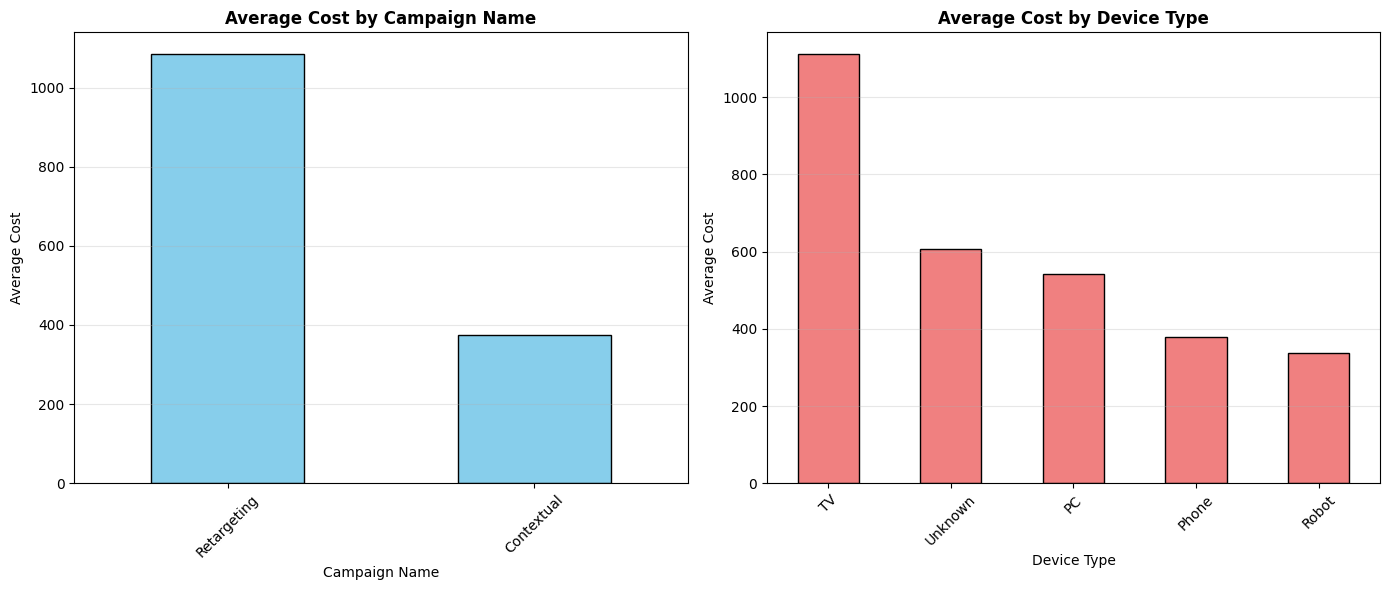

In [13]:
# Average cost by campaign_name and device_type
print("=" * 60)
print("AVERAGE COST BY CAMPAIGN NAME")
print("=" * 60)
avg_cost_by_campaign = df_programmatic.groupby('campaign_name')['cost_milli_cent'].mean().sort_values(ascending=False)
print(avg_cost_by_campaign)

print("\n" + "=" * 60)
print("AVERAGE COST BY DEVICE TYPE")
print("=" * 60)
avg_cost_by_device = df_programmatic.groupby('device_type')['cost_milli_cent'].mean().sort_values(ascending=False)
print(avg_cost_by_device)

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

avg_cost_by_campaign.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Average Cost by Campaign Name', fontsize=12, fontweight='bold')
ax1.set_xlabel('Campaign Name', fontsize=10)
ax1.set_ylabel('Average Cost', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

avg_cost_by_device.plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Average Cost by Device Type', fontsize=12, fontweight='bold')
ax2.set_xlabel('Device Type', fontsize=10)
ax2.set_ylabel('Average Cost', fontsize=10)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In average, retargeting cost more than contextual 
Device: Tv following by 'unknown device', PC , etc 

TOTAL COST BY MONTH
month
2024-01    1.847490e+09
2024-02    1.895560e+09
2024-03    1.173439e+09
2024-04    1.359768e+09
2024-05    1.608085e+09
2024-06    1.412971e+09
Freq: M, Name: cost_milli_cent, dtype: float64


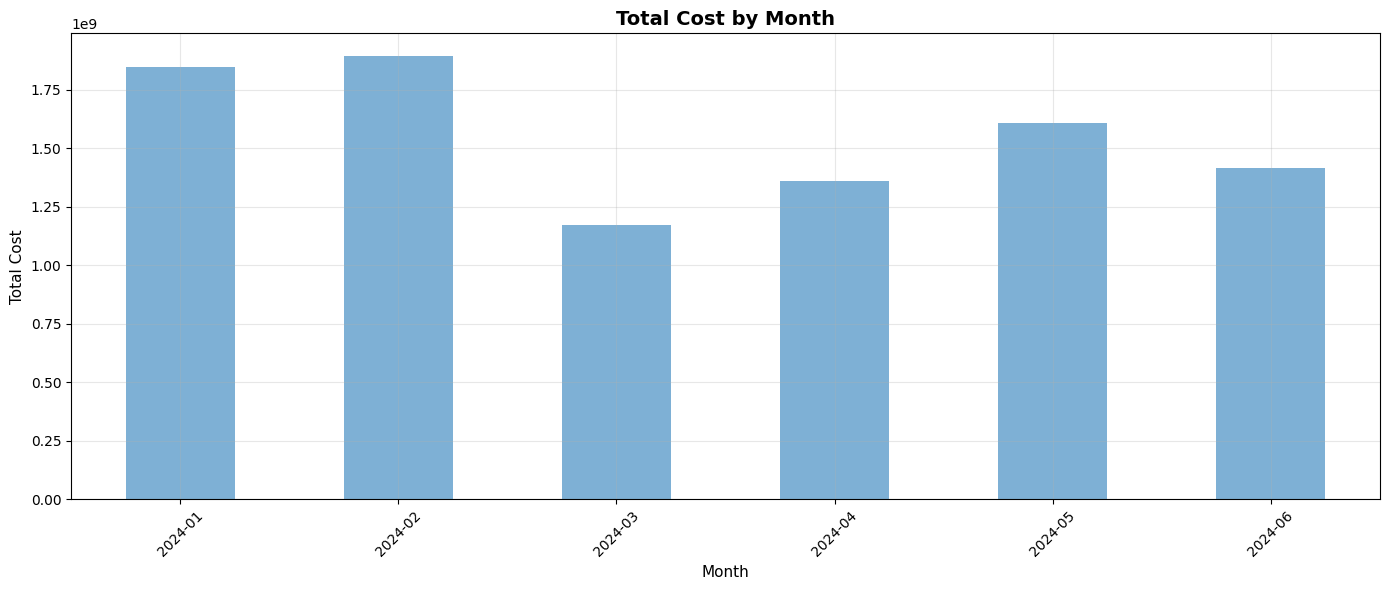

In [19]:
# Monthly costs
df_programmatic['date'] = pd.to_datetime(df_programmatic['timestamp_utc'])
df_programmatic['month'] = df_programmatic['date'].dt.to_period('M')

print("=" * 60)
print("TOTAL COST BY MONTH")
print("=" * 60)
monthly_cost = df_programmatic.groupby('month')['cost_milli_cent'].sum().sort_index()
print(monthly_cost)

# Visualization
fig, ax = plt.subplots(figsize=(14, 6))

monthly_cost.plot(kind='bar', ax=ax, color='#7EB0D5')
ax.set_title('Total Cost by Month', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

High in January and February

TOTAL COST BY MONTH AND CAMPAIGN
campaign_name    Contextual   Retargeting
month                                    
2024-01        1.048037e+09  7.994531e+08
2024-02        9.411439e+08  9.544162e+08
2024-03        7.587229e+08  4.147162e+08
2024-04        7.190289e+08  6.407388e+08
2024-05        8.688360e+08  7.392494e+08
2024-06        7.563356e+08  6.566354e+08


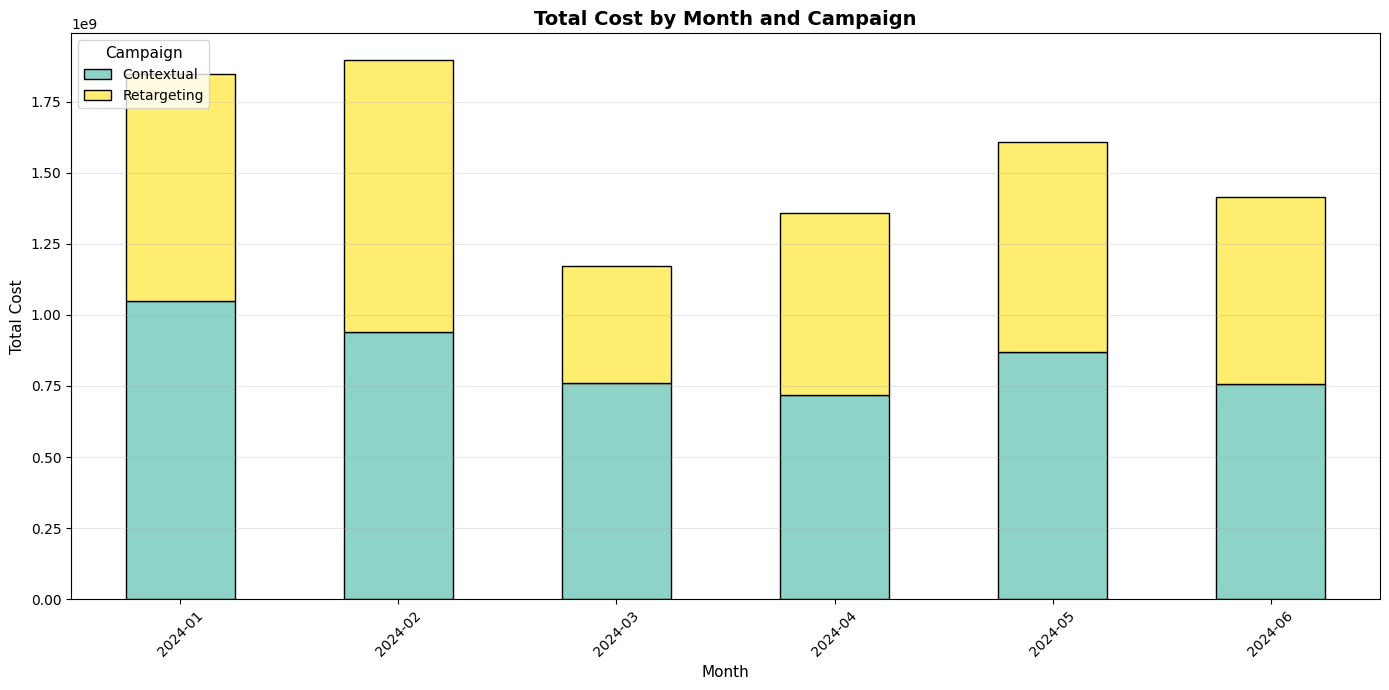

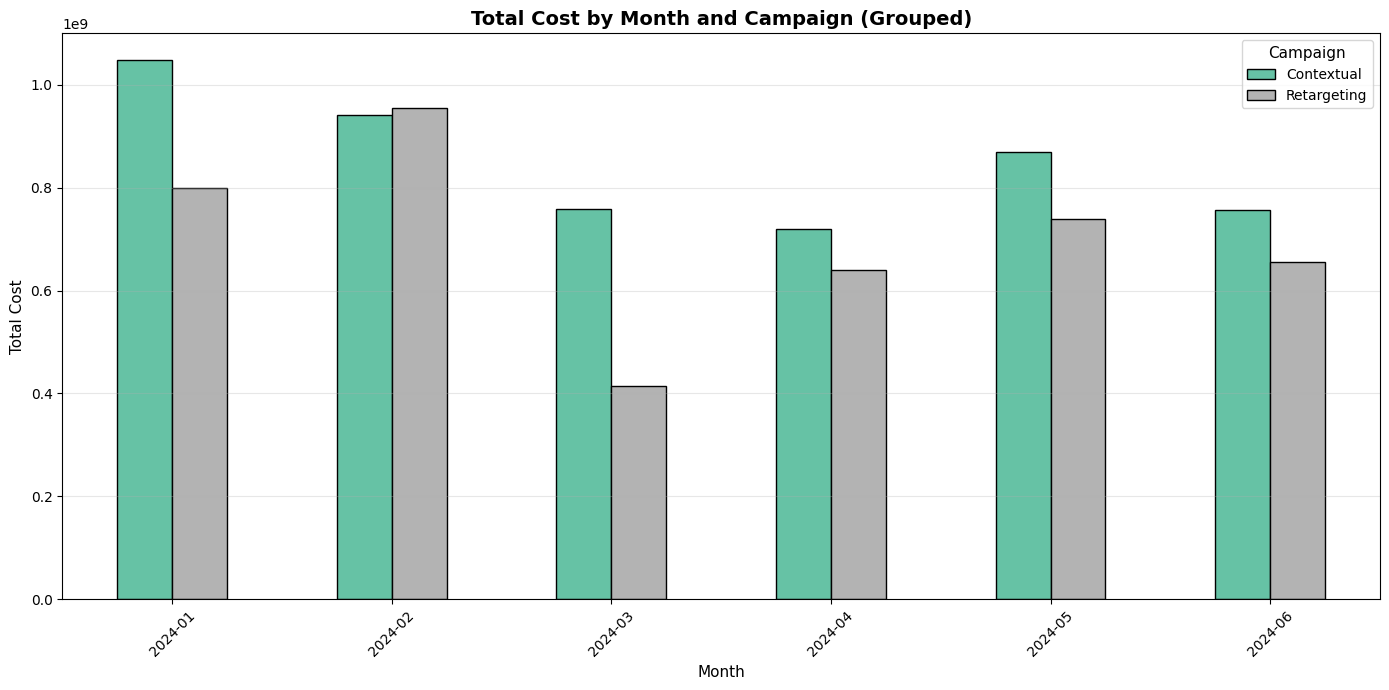

In [21]:
# Total cost by month and campaign
print("=" * 80)
print("TOTAL COST BY MONTH AND CAMPAIGN")
print("=" * 80)

monthly_campaign_cost = df_programmatic.groupby(['month', 'campaign_name'])['cost_milli_cent'].sum().unstack(fill_value=0)
print(monthly_campaign_cost)

# Visualization - Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 7))

monthly_campaign_cost.plot(kind='bar', stacked=True, ax=ax, colormap='Set3', edgecolor='black')

ax.set_title('Total Cost by Month and Campaign', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Campaign', fontsize=10, title_fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternative: Grouped Bar Chart
fig, ax = plt.subplots(figsize=(14, 7))

monthly_campaign_cost.plot(kind='bar', ax=ax, colormap='Set2', edgecolor='black')

ax.set_title('Total Cost by Month and Campaign (Grouped)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Campaign', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TOTAL COST BY MONTH AND DEVICE TYPE
device_type            PC         Phone     Robot            TV     Unknown
month                                                                      
2024-01      1.258198e+09  4.021446e+08  2488.442  1.871249e+08   20155.896
2024-02      1.256905e+09  4.282634e+08   330.897  2.103502e+08   41147.302
2024-03      6.369725e+08  4.062871e+08   914.228  1.301196e+08   58875.238
2024-04      8.214746e+08  3.820154e+08   313.657  1.562338e+08   43607.042
2024-05      9.301769e+08  3.721543e+08     0.000  3.056788e+08   75372.423
2024-06      6.410300e+08  2.615438e+08     0.000  5.102193e+08  177862.899


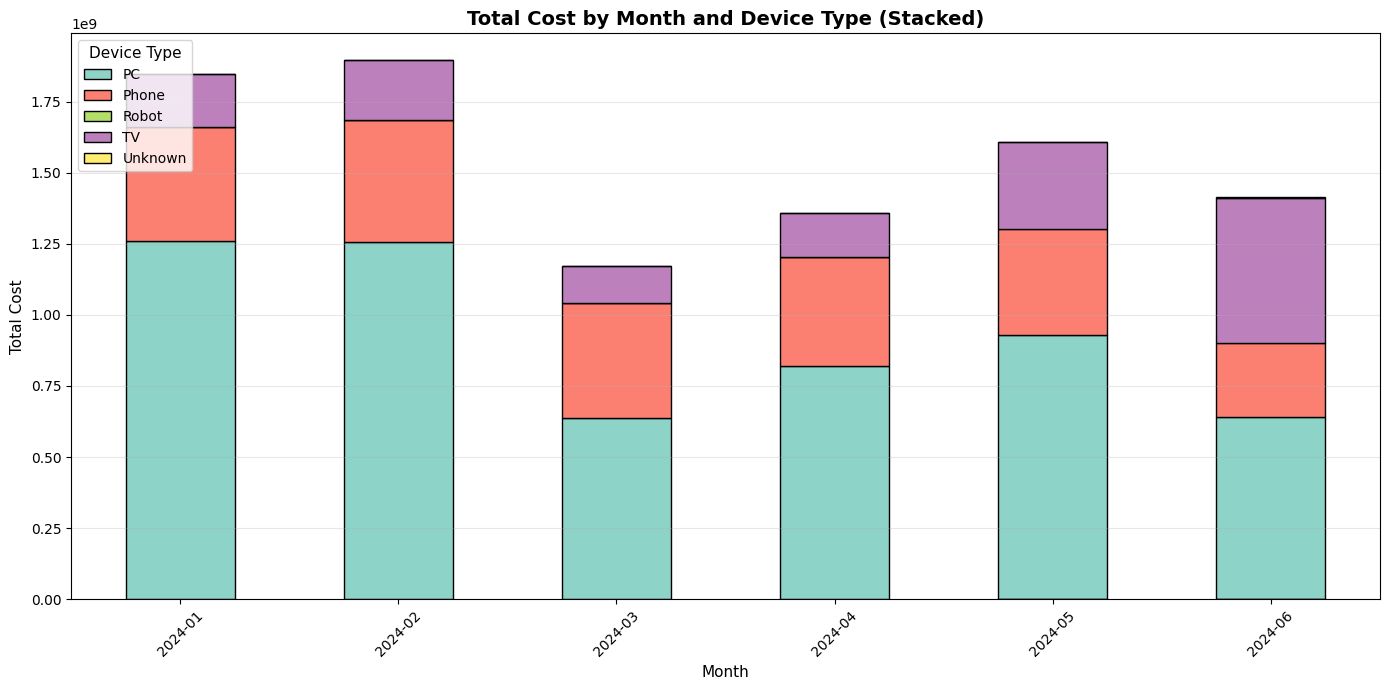

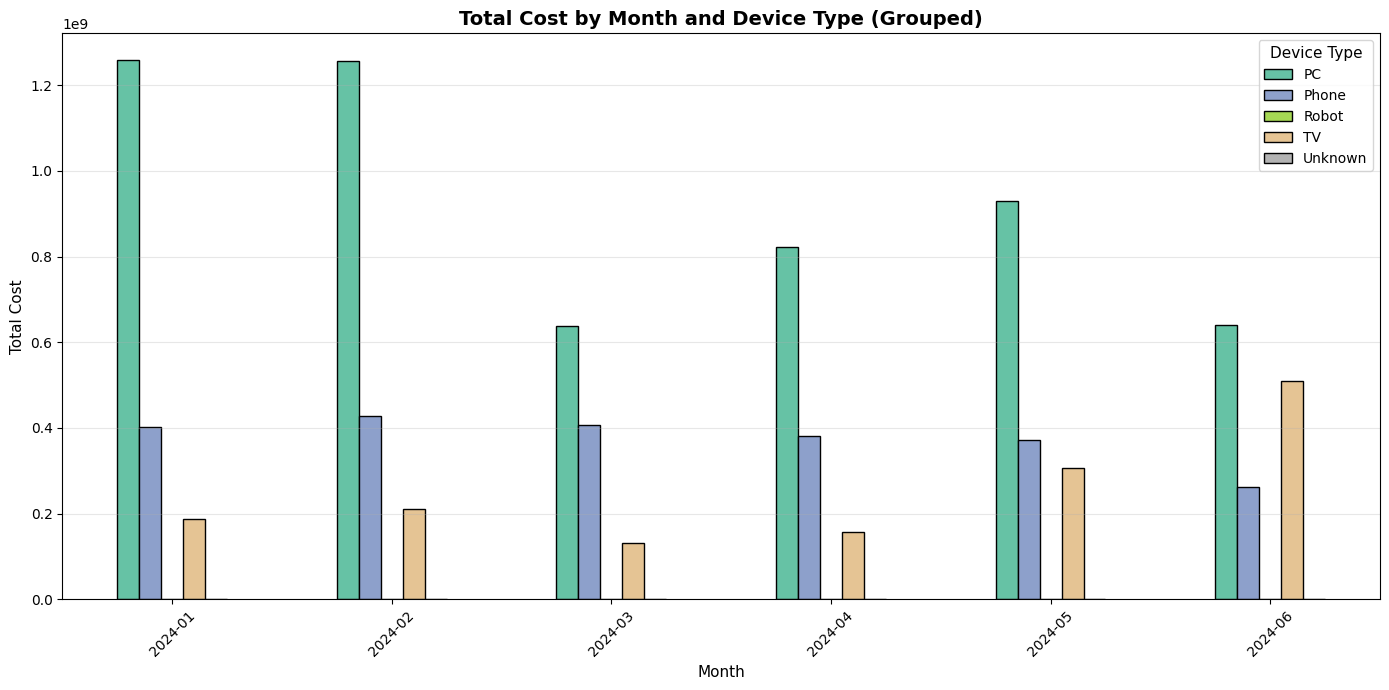

In [22]:
# Total cost by month and device_type
print("=" * 80)
print("TOTAL COST BY MONTH AND DEVICE TYPE")
print("=" * 80)

monthly_device_cost = df_programmatic.groupby(['month', 'device_type'])['cost_milli_cent'].sum().unstack(fill_value=0)
print(monthly_device_cost)

# Visualization - Stacked Bar Chart
fig, ax = plt.subplots(figsize=(14, 7))

monthly_device_cost.plot(kind='bar', stacked=True, ax=ax, colormap='Set3', edgecolor='black')

ax.set_title('Total Cost by Month and Device Type (Stacked)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Device Type', fontsize=10, title_fontsize=11, loc='upper left')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Alternative: Grouped Bar Chart
fig, ax = plt.subplots(figsize=(14, 7))

monthly_device_cost.plot(kind='bar', ax=ax, colormap='Set2', edgecolor='black')

ax.set_title('Total Cost by Month and Device Type (Grouped)', fontsize=14, fontweight='bold')
ax.set_xlabel('Month', fontsize=11)
ax.set_ylabel('Total Cost', fontsize=11)
ax.legend(title='Device Type', fontsize=10, title_fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()